### Импорт библиотек и датасетов

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
users = pd.read_csv('users.tsv',sep='\t')
history = pd.read_csv('history.tsv',sep='\t')
validate = pd.read_csv('validate.tsv',sep='\t')
validate_answers = pd.read_csv('validate_answers.tsv',sep='\t')

### Инфо

In [4]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27769 entries, 0 to 27768
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  27769 non-null  int64
 1   sex      27769 non-null  int64
 2   age      27769 non-null  int64
 3   city_id  27769 non-null  int64
dtypes: int64(4)
memory usage: 867.9 KB


,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


In [5]:
history.info()
history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147857 entries, 0 to 1147856
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   hour       1147857 non-null  int64  
 1   cpm        1147857 non-null  float64
 2   publisher  1147857 non-null  int64  
 3   user_id    1147857 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 35.0 MB


,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


In [6]:
validate.info()
validate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.4+ KB


,cpm,hour_start,hour_end,publishers,audience_size,user_ids
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."


In [7]:
validate_answers.info()
validate_answers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   at_least_one    1008 non-null   float64
 1   at_least_two    1008 non-null   float64
 2   at_least_three  1008 non-null   float64
dtypes: float64(3)
memory usage: 23.8 KB


,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270


### Визуализация

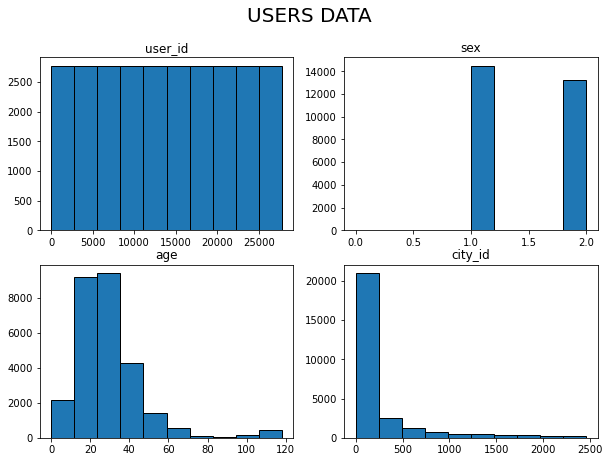

In [8]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('USERS DATA', fontsize = 20)

for i in range(len(users.columns)):
    plt.subplot(2,2,i+1)
    plt.title(users.columns[i])
    plt.hist(users[users.columns[i]], edgecolor='black')


plt.show()

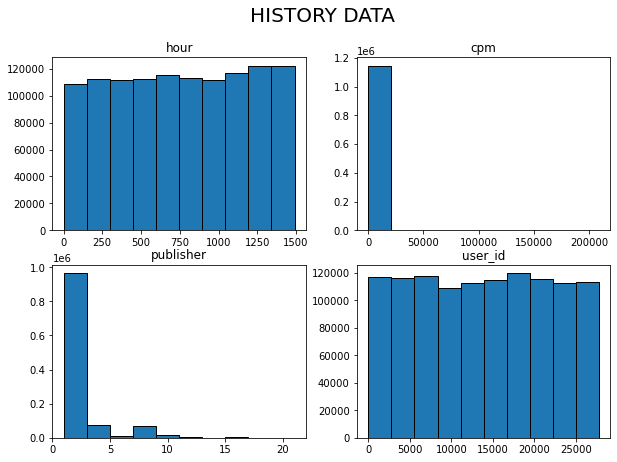

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('HISTORY DATA', fontsize = 20)

for i in range(len(history.columns)):
    plt.subplot(2,2,i+1)
    plt.title(history.columns[i])
    plt.hist(history[history.columns[i]], edgecolor='black')

plt.show()

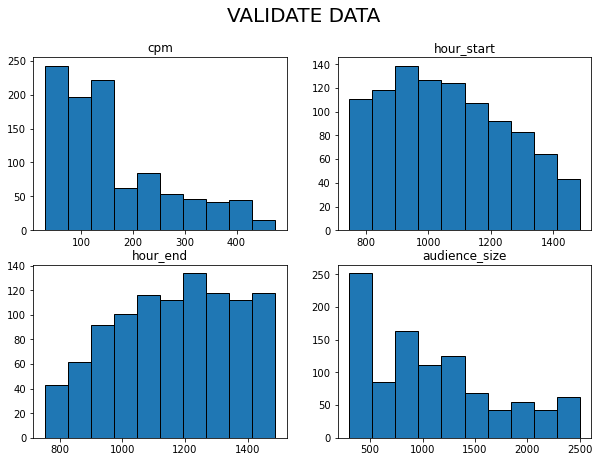

In [10]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('VALIDATE DATA', fontsize = 20)

validate_vis = validate.drop(['publishers','user_ids'],axis=1) # Эти 2 колонки содержат списки, не уверен, как их визуализировать

for i in range(len(validate_vis.columns)):
    plt.subplot(2,2,i+1)
    plt.title(validate_vis.columns[i])
    plt.hist(validate_vis[validate_vis.columns[i]], edgecolor='black')

plt.show()

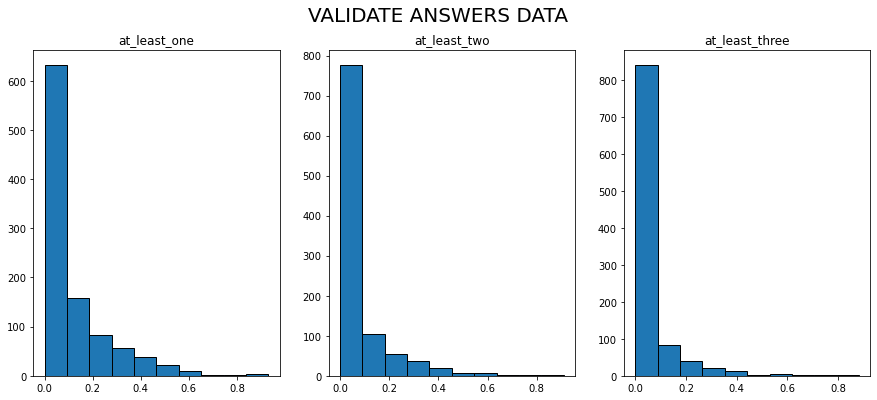

In [11]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.suptitle('VALIDATE ANSWERS DATA', fontsize = 20)

for i in range(len(validate_answers.columns)):
    plt.subplot(1,3,i+1)
    plt.title(validate_answers.columns[i])
    plt.hist(validate_answers[validate_answers.columns[i]], edgecolor='black')

plt.show()

### Корреляция validate и validate_answers

#### Выделение, преобразование и удаление признаков

Для удобства обозначений

In [465]:
X = validate.copy()
Y = validate_answers.copy()

Выделение

In [466]:
X.insert(len(X.columns),
         'delay',
         X['hour_end']-X['hour_start'])

In [467]:
# Вытаскиваем фичи по пользователям

no_sex_prop = []
no_age_prop = []

age_mean = []
age_std = []
city_count = []

for index, row in X.iterrows():
    
    users_info = users[
        users['user_id'].isin(
            [ int(i) for i in row['user_ids'].split(',')]
        )
    ]

    no_sex_prop.append((users_info['sex'] == 0).sum() / row['audience_size'])
    no_age_prop.append((users_info['age'] == 0).sum() / row['audience_size'])
    

    age_mean.append(users_info[(users_info['age'] < 100) & (users_info['age'] > 0)]['age'].mean())
    age_std.append(users_info[(users_info['age'] < 100) & (users_info['age'] > 0)]['age'].std())
    city_count.append(len(users_info['city_id'].unique()))

X['no_sex_prop'] = no_sex_prop
X['no_age_prop'] = no_age_prop

X['age_mean'] = age_mean
X['age_std'] = age_std
X['city_count'] = city_count

In [468]:
# вытаскиваем фичи по publishers

publishers_amount = 21

publishers_features = pd.DataFrame(columns=['p'+str(i) for i in range(1,publishers_amount+1)])

for index, row in X.iterrows():
    
    publishers = [int(i) for i in row['publishers'].split(',')]
    
    publishers_features.loc[index] = [int(i in publishers) for i in range(1,publishers_amount+1)]

X = pd.concat([X, publishers_features], axis=1)
    
    

Преобразование

In [469]:
for column in X.columns: 
    if column in ['publishers', 'user_ids']:
        continue
    X[column] = (X[column] - X[column].mean()) / X[column].std() 

In [470]:
from sklearn.decomposition import PCA

X[['pca1','pca2']] = PCA(2).fit_transform(X[['city_count', 'audience_size']])

In [471]:
X['publishers_count'] = X['publishers'].apply(lambda s: s.count(','))

Удаление

In [137]:
X = X.drop(['hour_end', 'hour_start', 'publishers', 'user_ids', 'city_count', 'audience_size', 'age_std', 'publishers_count'] + [('p'+str(i)) for i in range(3,22)], axis = 1)

Формируем общий датафрейм для удобства

In [472]:
df = pd.concat([X, Y], axis = 1)

#### Матрицы

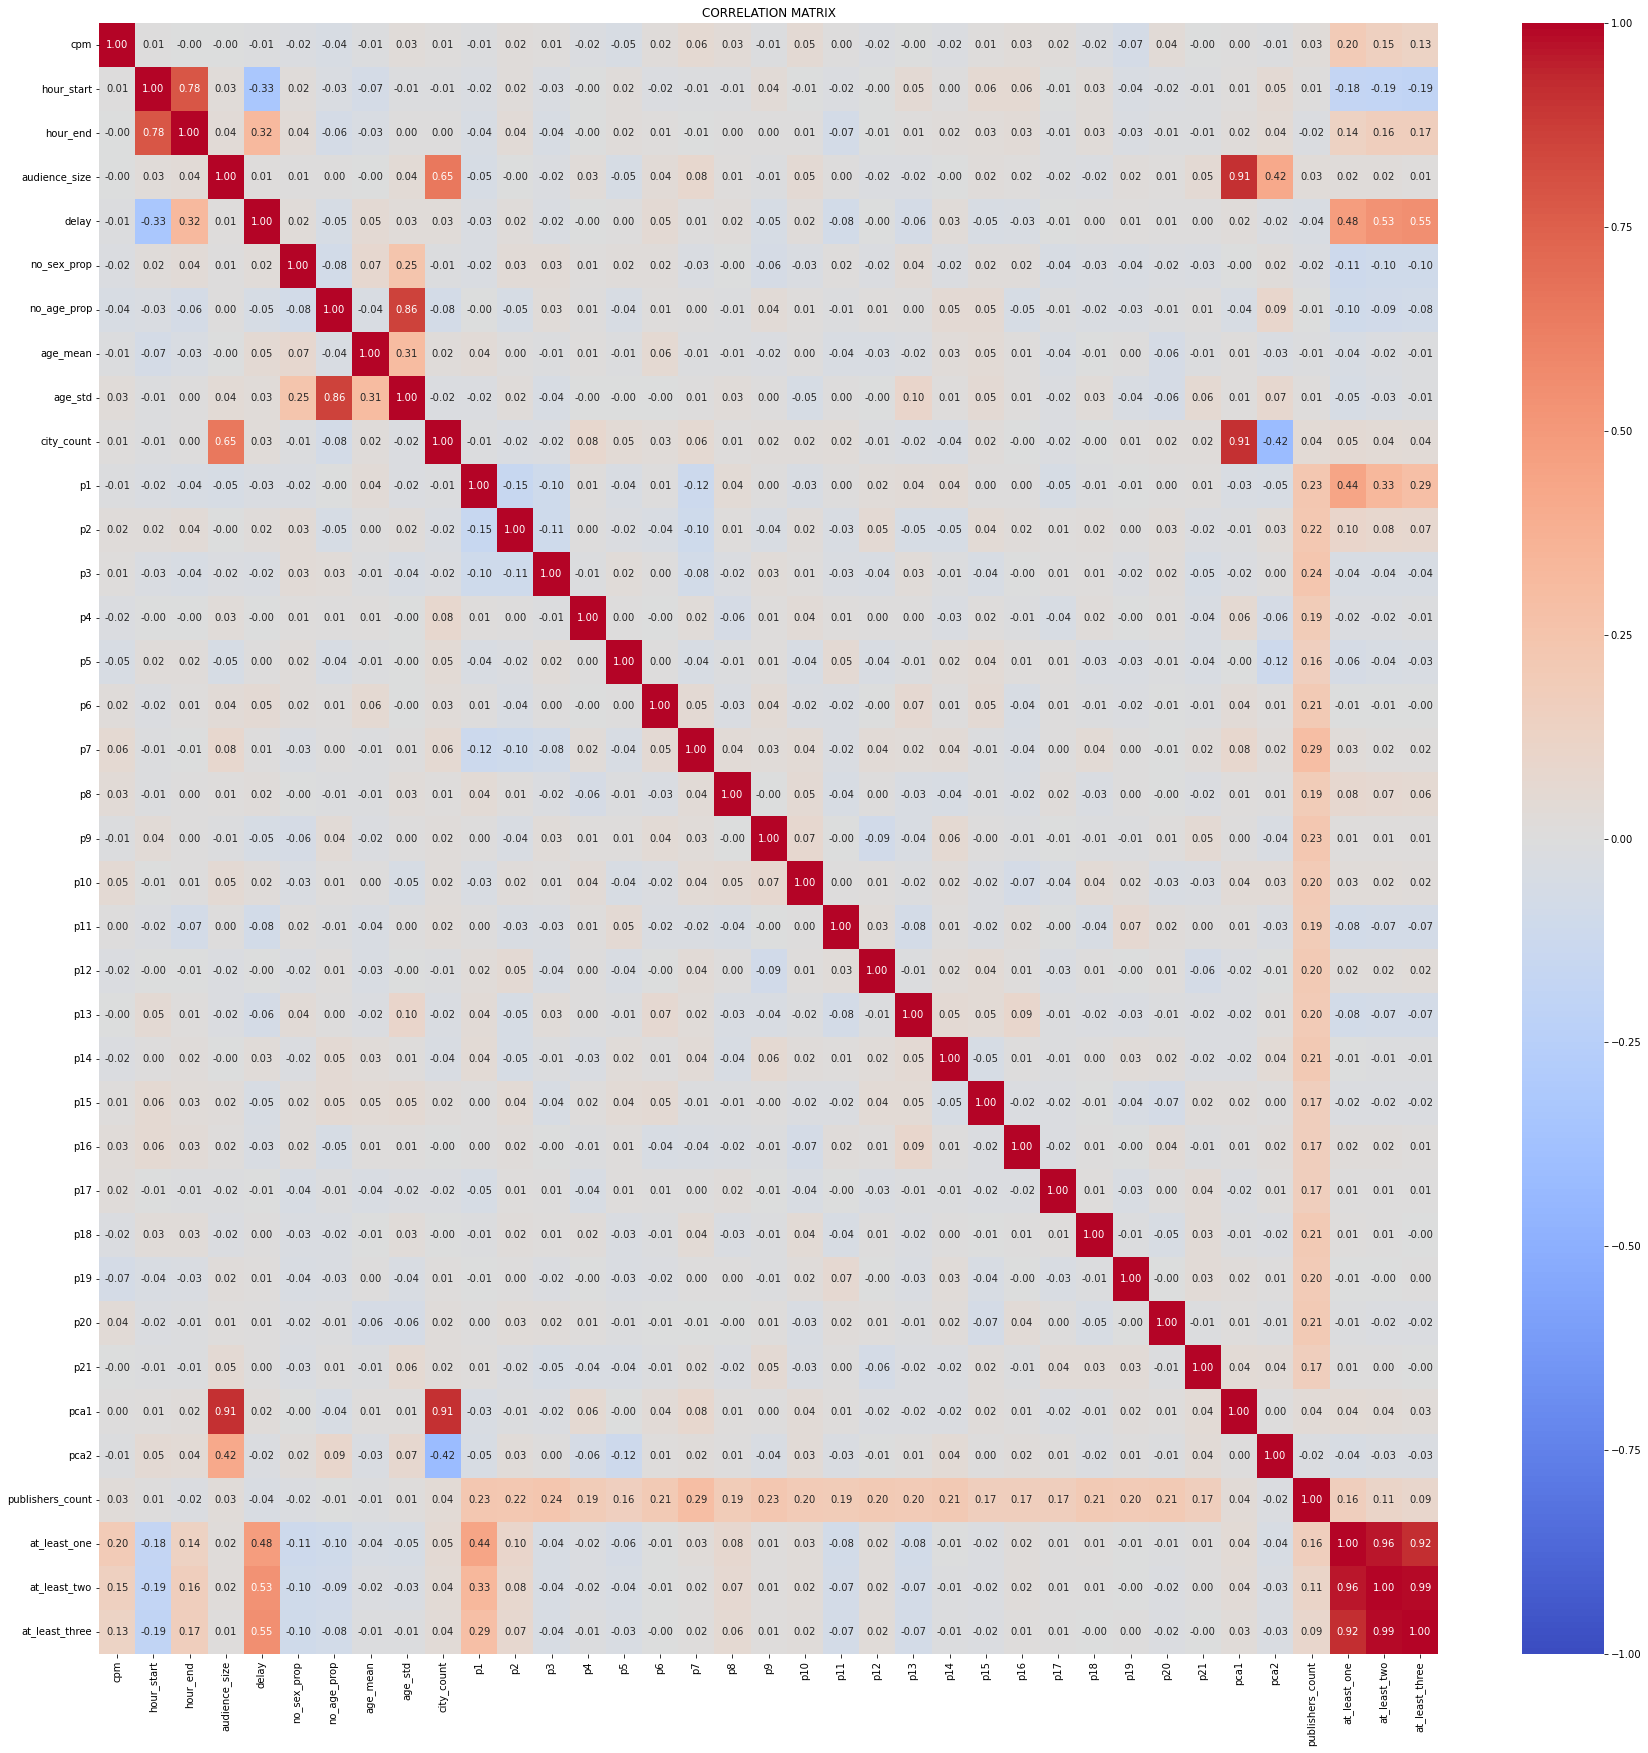

In [473]:
f = plt.figure(facecolor='white')
f.set_figwidth(30)
f.set_figheight(30)

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('CORRELATION MATRIX')
plt.show()

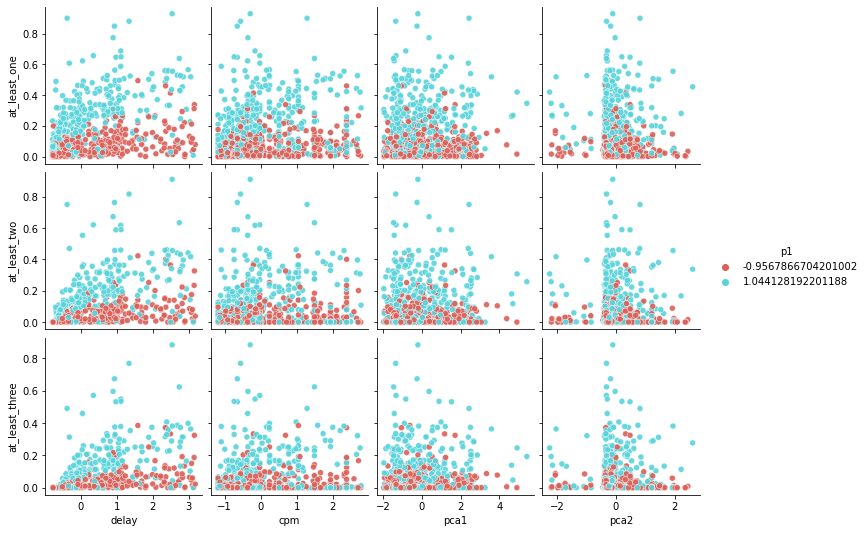

In [474]:
pp = sns.pairplot(df,
             x_vars = ['delay','cpm', 'pca1', 'pca2'],
             y_vars = ['at_least_one', 'at_least_two', 'at_least_three'],
             hue='p1',
             plot_kws = dict(alpha = 0.9),
             height = 2.5,
             palette=sns.color_palette("hls", 2))
#pp.map(sns.regplot, scatter = False)
plt.show()

### Черновая модель

In [475]:
X = X.drop(['publishers','user_ids'], axis=1)

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
X_train = X_train.fillna(0)
normalizer_x = StandardScaler().fit(X_train)
X_train = normalizer_x.transform(X_train)
normalizer_y = StandardScaler().fit(Y_train)
Y_train = normalizer_y.transform(Y_train)


In [501]:
def get_smoothed_log_mape_column_value(responses_column, answers_column, epsilon):
    
    responses_column = responses_column*(responses_column>0)*(responses_column != None)
    try:
        ans = np.abs(np.log(
            (responses_column + epsilon)
            / (answers_column + epsilon))
        ).mean()
    
    except RuntimeWarning:
        print((responses_column + epsilon)
            / (answers_column + epsilon))
        ans = (responses_column + epsilon) / (answers_column + epsilon)
    return ans

def get_smoothed_mean_log_accuracy_ratio(answers, responses, epsilon=0.005):
    answers = normalizer_y.inverse_transform(answers)
    responses = normalizer_y.inverse_transform(responses)
    try:
        log_accuracy_ratio_mean = np.array(
            [
                get_smoothed_log_mape_column_value(responses[:,0], answers[:,0], epsilon),
                get_smoothed_log_mape_column_value(responses[:,1], answers[:,1], epsilon),
                get_smoothed_log_mape_column_value(responses[:,2], answers[:,2], epsilon),
            ]
        ).mean()
    except KeyError as e:
        print('----')
        print(answers)
        return 1e10

    percentage_error = 100 * (np.exp(log_accuracy_ratio_mean) - 1)

    return percentage_error

In [546]:
# Импорт класса Ridge из модуля linear_model scikit-learn
from sklearn.linear_model import MultiTaskElasticNet

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {
    'alpha': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
    'l1_ratio': [1e-5, 1e-3, 0.01, 0.1, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999, 1]
}

# Передача в GridSearchCV Ridge-модели, потенциальных альфа-значений,
# метрики качества
ridge = GridSearchCV(MultiTaskElasticNet(),
                     alpha_values,
                     #scoring=make_scorer(get_smoothed_mean_log_accuracy_ratio, greater_is_better=False),
                     scoring='explained_variance',
                     cv=15)

res = ridge.fit(X_train,Y_train)

# обучение модели 
print('Лучшее значение alpha:', res.best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', res.best_score_)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561.1051116957951, tolerance: 0.2193430610505655
  ) = cd_fast.enet_coordinate_descent_multi_task(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.2785588815003, tolerance: 0.2274284339906568
  ) = cd_fast.enet_coordinate_descent_multi_task(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 579.4460695875873, tolerance: 0.2234182263239318
  ) = cd_fast.enet_coordinate_descent_multi_task(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

Лучшее значение alpha: {'alpha': 0.08, 'l1_ratio': 0.1}
Метрика качества: 0.45891144124541744


In [547]:
preds = ridge.predict(X_train)

print('train result',get_smoothed_mean_log_accuracy_ratio( Y_train, preds))

train result 139.10720177859864


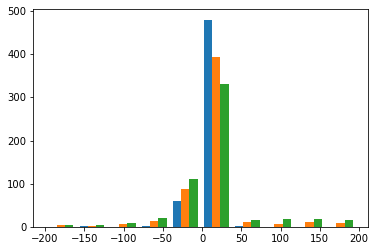

In [548]:
ae = (normalizer_y.inverse_transform(Y_train) - normalizer_y.inverse_transform(ridge.predict(X_train)))
pe = ae/(normalizer_y.inverse_transform(Y_train)+0.0001)
plt.hist(pe[((pe<200)*(pe>-200)).all(axis=1)])

plt.show()

In [ ]:
Y_train = normalizer_y.inverse_transform(Y_train)
preds = normalizer_y.inverse_transform(preds)

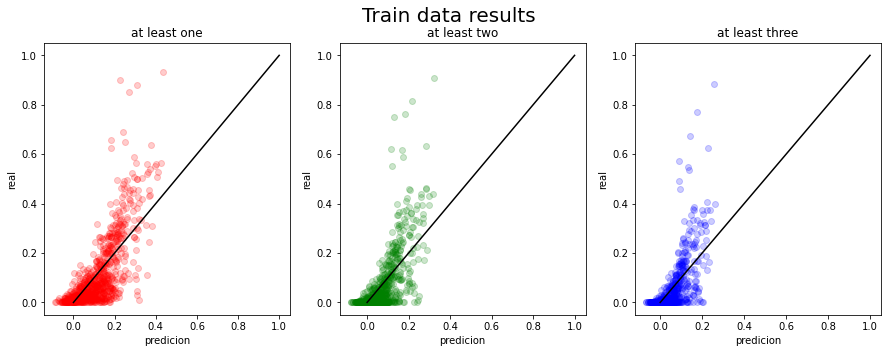

In [559]:
f = plt.figure(facecolor='white')
f.set_figwidth(15)
f.set_figheight(5)

plt.suptitle('Train data results', fontsize = 20)
plt.subplot(1,3,1)
plt.scatter(preds[:,0], Y_train[:,0], color='r', alpha=0.2,)
plt.title('at least one')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,2)
plt.scatter(preds[:,1], Y_train[:,1], color='g', alpha=0.2)
plt.title('at least two')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,3)
plt.scatter(preds[:,2], Y_train[:,2], color='b', alpha=0.2)
plt.title('at least three')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.show()

In [550]:
preds_test = ridge.predict(normalizer_x.transform(X_test.fillna(0)))

print('test result:',get_smoothed_mean_log_accuracy_ratio( normalizer_y.transform(Y_test), preds_test))

preds_test = normalizer_y.inverse_transform(preds_test)

test result: 140.54582869683063


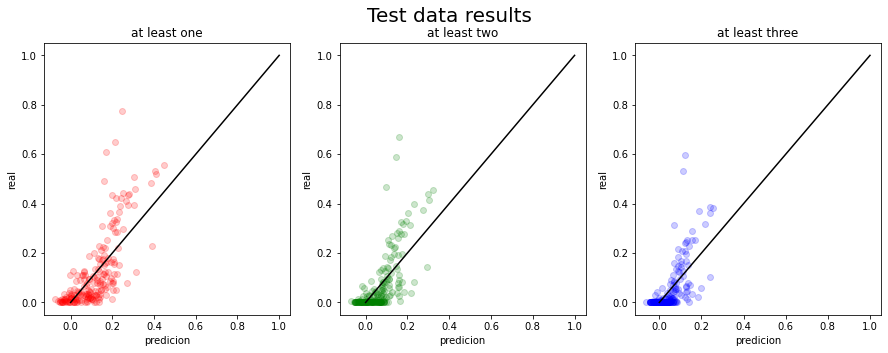

In [560]:
f = plt.figure(facecolor='white')
f.set_figwidth(15)
f.set_figheight(5)

plt.suptitle('Test data results', fontsize = 20)

plt.subplot(1,3,1)
plt.scatter(preds_test[:,0], Y_test.values[:,0], color='r', alpha=0.2,)
plt.title('at least one')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,2)
plt.scatter(preds_test[:,1], Y_test.values[:,1], color='g', alpha=0.2)
plt.title('at least two')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,3)
plt.scatter(preds_test[:,2], Y_test.values[:,2], color='b', alpha=0.2)
plt.title('at least three')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.show()

In [552]:
ridge.best_estimator_.coef_

array([[ 1.55626582e-01, -1.02708610e-01,  8.78170013e-02,
         0.00000000e+00,  4.07328387e-01, -9.33870544e-02,
        -4.77990124e-02, -7.05612003e-02, -1.26967048e-02,
         2.21027508e-02,  4.35651806e-01,  1.17852403e-01,
         0.00000000e+00, -2.79091890e-02, -3.49282062e-02,
        -3.93981838e-02,  4.14743300e-02, -4.51147158e-03,
         1.36599657e-02,  9.87875676e-05, -4.71948208e-02,
         7.70517996e-03, -6.54572916e-02, -4.57336665e-02,
         7.57190955e-03,  4.69294238e-02, -0.00000000e+00,
         3.38740560e-04, -1.52310574e-02, -3.05171146e-02,
        -2.10162378e-02,  1.40797831e-02, -0.00000000e+00,
         7.27310985e-02],
       [ 1.21711183e-01, -1.09458697e-01,  9.68830916e-02,
         0.00000000e+00,  4.41360252e-01, -9.06133122e-02,
        -4.80380670e-02, -5.67145125e-02, -4.16230926e-03,
         1.37885338e-02,  3.29367145e-01,  9.23411322e-02,
        -0.00000000e+00, -2.69217952e-02, -2.76504426e-02,
        -3.51473955e-02,  2.99